In [1]:
from common import *
import gzip
import io
import matplotlib.pyplot as plt

/Users/vinayakvsv/biophysics170/biophysics170_finalproject/../data


In [61]:
#print(datafiles)
cooldir = os.path.join(DATA_DIR,'coolfiles')
datafiles = [os.path.join(cooldir,i) for i in os.listdir(cooldir) if ".cool" in i]
print(datafiles)
nora_coolerfiles = [i for i in datafiles if '.cool' in i]

['/Users/vinayakvsv/biophysics170/biophysics170_finalproject/../data/coolfiles/GSM2644950_Washoff2days-R2.100000.cool', '/Users/vinayakvsv/biophysics170/biophysics170_finalproject/../data/coolfiles/GSM2644948_Auxin2days-R2.100000.cool', '/Users/vinayakvsv/biophysics170/biophysics170_finalproject/../data/coolfiles/GSM2644946_Untreated-R2.100000.cool', '/Users/vinayakvsv/biophysics170/biophysics170_finalproject/../data/coolfiles/GSM2644946_Untreated-R2.20000.cool', '/Users/vinayakvsv/biophysics170/biophysics170_finalproject/../data/coolfiles/GSM2644947_Auxin2days-R1.100000.cool', '/Users/vinayakvsv/biophysics170/biophysics170_finalproject/../data/coolfiles/GSM2644948_Auxin2days-R2.20000.cool', '/Users/vinayakvsv/biophysics170/biophysics170_finalproject/../data/coolfiles/GSM2644945_Untreated-R1.20000.cool', '/Users/vinayakvsv/biophysics170/biophysics170_finalproject/../data/coolfiles/GSM2644949_Washoff2days-R1.20000.cool', '/Users/vinayakvsv/biophysics170/biophysics170_finalproject/../dat

In [64]:
#get metadata
#import re
filenames = [i for i in os.listdir(cooldir) if ".cool" in i]
files_meta = pandas.DataFrame([re.split('_|-|[.]|.cool',i)[:-1] + [j] for i,j in zip(filenames,datafiles)])
files_meta.columns = ["sample","treatment","read number","baseres","file"]
print(files_meta)

        sample     treatment read number baseres  \
0   GSM2644950  Washoff2days          R2  100000   
1   GSM2644948    Auxin2days          R2  100000   
2   GSM2644946     Untreated          R2  100000   
3   GSM2644946     Untreated          R2   20000   
4   GSM2644947    Auxin2days          R1  100000   
5   GSM2644948    Auxin2days          R2   20000   
6   GSM2644945     Untreated          R1   20000   
7   GSM2644949  Washoff2days          R1   20000   
8   GSM2644945     Untreated          R1  100000   
9   GSM2644949  Washoff2days          R1  100000   
10  GSM2644947    Auxin2days          R1   20000   
11  GSM2644950  Washoff2days          R2   20000   

                                                 file  
0   /Users/vinayakvsv/biophysics170/biophysics170_...  
1   /Users/vinayakvsv/biophysics170/biophysics170_...  
2   /Users/vinayakvsv/biophysics170/biophysics170_...  
3   /Users/vinayakvsv/biophysics170/biophysics170_...  
4   /Users/vinayakvsv/biophysics170/biophys

In [110]:
#let's create cooler files for all objects
cooler1 = cooler.Cooler(datafiles[0])#[cooler.Cooler(i) for i in files_meta.loc[:,"file"]]
coolers = [cooler.Cooler(i) for i in files_meta.loc[:,"file"]]

#higher resolution files
higrescool_meta = files_meta[files_meta.baseres == '20000']
print(higrescool_meta)

higrescool = [cooler.Cooler(i) for i in higrescool_meta.loc[:,"file"]]
print(higrescool)

        sample     treatment read number baseres  \
3   GSM2644946     Untreated          R2   20000   
5   GSM2644948    Auxin2days          R2   20000   
6   GSM2644945     Untreated          R1   20000   
7   GSM2644949  Washoff2days          R1   20000   
10  GSM2644947    Auxin2days          R1   20000   
11  GSM2644950  Washoff2days          R2   20000   

                                                 file  
3   /Users/vinayakvsv/biophysics170/biophysics170_...  
5   /Users/vinayakvsv/biophysics170/biophysics170_...  
6   /Users/vinayakvsv/biophysics170/biophysics170_...  
7   /Users/vinayakvsv/biophysics170/biophysics170_...  
10  /Users/vinayakvsv/biophysics170/biophysics170_...  
11  /Users/vinayakvsv/biophysics170/biophysics170_...  
[<Cooler "GSM2644946_Untreated-R2.20000.cool::/">, <Cooler "GSM2644948_Auxin2days-R2.20000.cool::/">, <Cooler "GSM2644945_Untreated-R1.20000.cool::/">, <Cooler "GSM2644949_Washoff2days-R1.20000.cool::/">, <Cooler "GSM2644947_Auxin2days-R1.2000

/Users/vinayakvsv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


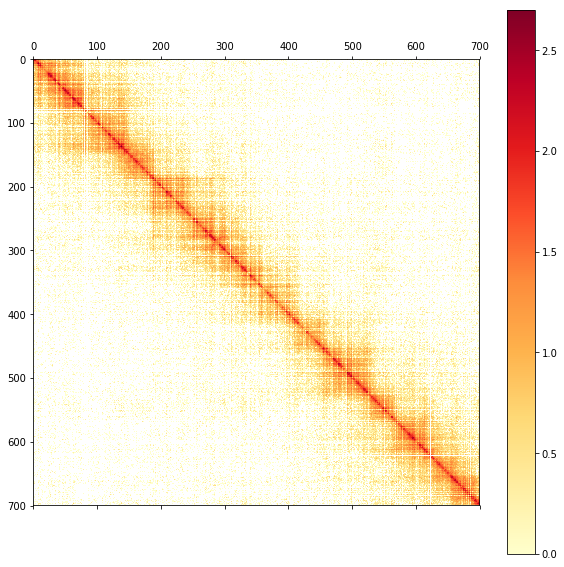

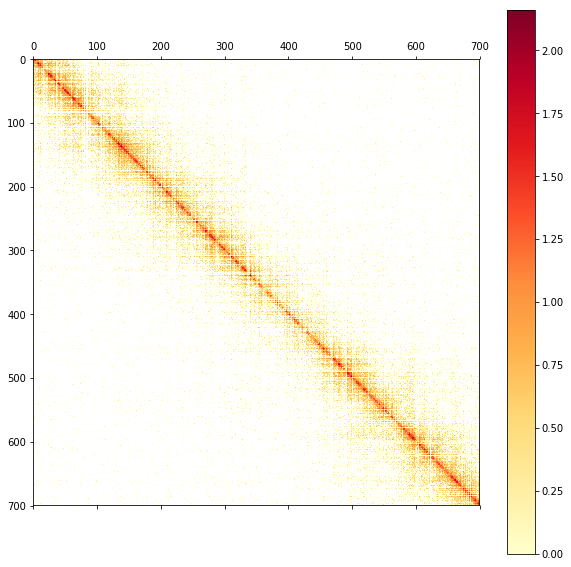

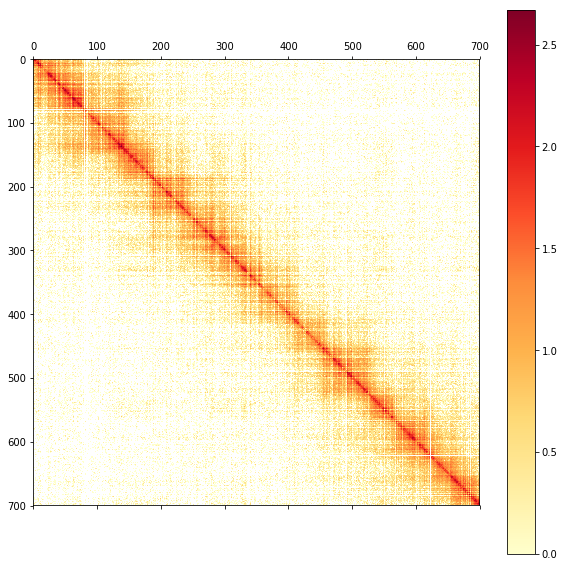

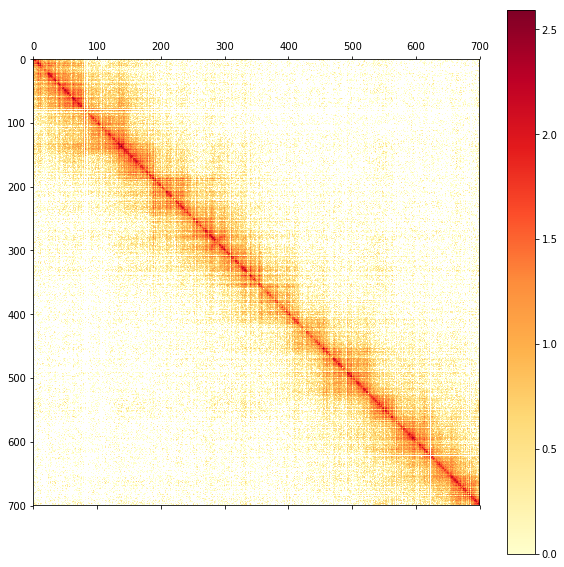

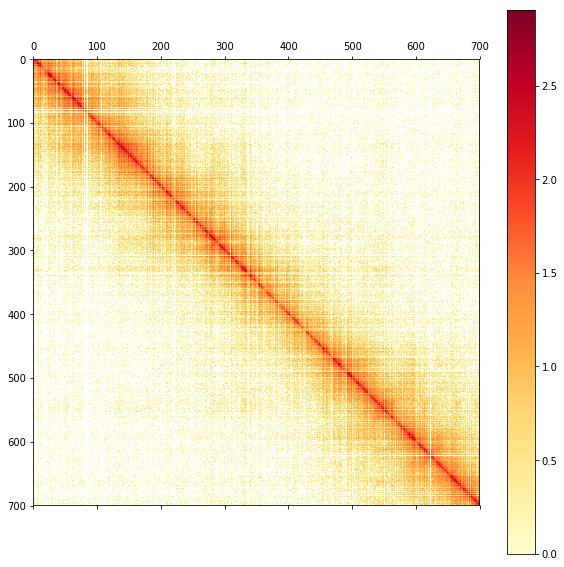

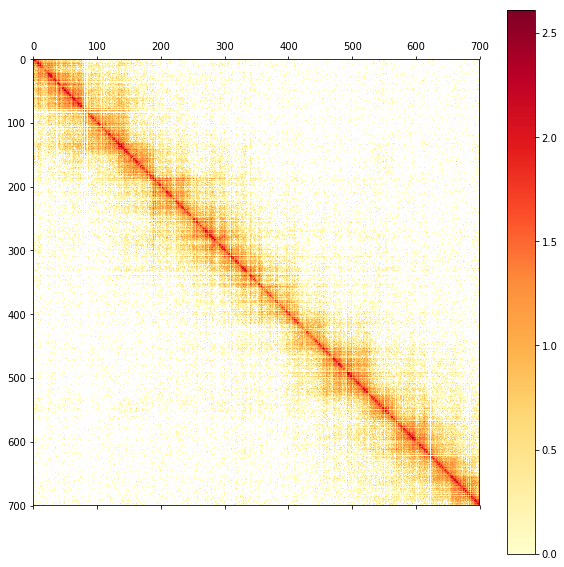

In [119]:
for i in higrescool:
    imat = i.matrix(balance=False, sparse=True)[500:1200, 500:1200]
    arr = imat.toarray()
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.matshow(np.log10(arr), cmap='YlOrRd')
    fig.colorbar(im)
    plt.show()

# Call TADs in this dataset

In [ ]:
# Questions for Leonid
1. Nora data: 